In [0]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
main_df = pd.read_csv('MagicBricks.csv')
df = main_df.copy()
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [0]:
df.shape

(1259, 11)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [0]:
for col in df.columns:
  print(col)
  print(df[col].value_counts())
  print(df[col].isna().sum())
  print("\n\n")

Area
900.0      67
1500.0     50
1800.0     48
1000.0     42
1600.0     38
           ..
530.0       1
972.0       1
324.0       1
4800.0      1
11050.0     1
Name: Area, Length: 315, dtype: int64
0



BHK
3     541
2     367
4     220
1      96
5      27
6       6
10      1
7       1
Name: BHK, dtype: int64
0



Bathroom
2.0    551
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: Bathroom, dtype: int64
2



Furnishing
Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64
5



Locality
Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                             

(array([ 32.,  95., 158., 186., 207., 290., 148., 112.,  21.,  10.]),
 array([13.81551056, 14.36357445, 14.91163834, 15.45970223, 16.00776613,
        16.55583002, 17.10389391, 17.6519578 , 18.2000217 , 18.74808559,
        19.29614948]),
 <a list of 10 Patch objects>)

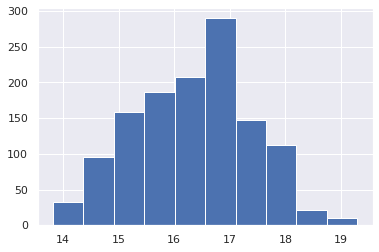

In [0]:
log_price = np.log(df['Price'])
plt.hist(log_price)

In [0]:
df1 = df.drop('Per_Sqft', axis  =1)

In [0]:
df1.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor


In [0]:
df1[df1['Bathroom'].isna() == True]


,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
30,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment
120,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment


In [0]:
df1.iloc[30,2] = 1

In [0]:
df1.iloc[120,2] = 1


In [0]:
df1['Transaction'] = df1['Transaction'].map({'Resale': 0,'New_Property':1})

In [0]:
df1['Status'] = df1['Status'].map({'Ready_to_move':1, 'Almost_ready':0})

In [0]:
indices = df1[df1['Furnishing'].isna() == True]
df2 = df1.drop(indices.index,axis=0)


In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1254 non-null   float64
 1   BHK          1254 non-null   int64  
 2   Bathroom     1254 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1254 non-null   object 
 5   Parking      1225 non-null   float64
 6   Price        1254 non-null   int64  
 7   Status       1254 non-null   int64  
 8   Transaction  1254 non-null   int64  
 9   Type         1254 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 107.8+ KB


In [0]:
df2['Type'] = df2['Type'].map({'Builder_Floor': 0,'Apartment':1})

In [0]:
df2['Furnishing'] = df2['Furnishing'].map({'Unfurnished': 0,'Semi-Furnished':0.5, 'Furnished':1})

In [0]:
df2.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
0,800.0,3,2.0,0.5,Rohini Sector 25,1.0,6500000,1,1,0
1,750.0,2,2.0,0.5,"J R Designers Floors, Rohini Sector 24",1.0,5000000,1,1,1
2,950.0,2,2.0,1.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,1,0,1
3,600.0,2,2.0,0.5,Rohini Sector 24,1.0,4200000,1,0,0
4,650.0,2,2.0,0.5,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,1,1,0


In [0]:
df3 = df2.copy()

In [0]:
df3[df3['Parking'].isna() == True]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
30,1500.0,1,1.0,0.0,Lajpat Nagar 2,NaN,13500000,1,0,1
90,900.0,1,1.0,0.5,Lajpat Nagar 3,NaN,8900000,1,0,0
120,1500.0,1,1.0,0.0,Lajpat Nagar 2,NaN,13500000,1,0,1
269,2799.0,4,4.0,0.5,"Kailash Colony, Greater Kailash",NaN,65000000,1,1,0
299,700.0,2,2.0,0.0,"Ram Nagar, Shahdara",NaN,4600000,1,1,0
300,750.0,2,2.0,0.5,"Jyoti Nagar West, Shahdara",NaN,9200000,1,0,0
513,1250.0,2,1.0,0.5,"DDA Flats Mansarovar Park, Seelampur, Shahdara",NaN,7500000,1,0,1
514,504.0,3,1.0,0.5,"Seelampur, Shahdara",NaN,3600000,1,0,1
515,65.0,3,2.0,0.5,"Shanti Mohalla, Shahdara",NaN,35000000,1,1,1
516,450.0,2,1.0,0.0,"Seelampur, Shahdara",NaN,6000000,1,0,1


In [0]:
df3.fillna(value = {'Parking':0}, inplace=True)

In [0]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1254 non-null   float64
 1   BHK          1254 non-null   int64  
 2   Bathroom     1254 non-null   float64
 3   Furnishing   1254 non-null   float64
 4   Locality     1254 non-null   object 
 5   Parking      1254 non-null   float64
 6   Price        1254 non-null   int64  
 7   Status       1254 non-null   int64  
 8   Transaction  1254 non-null   int64  
 9   Type         1254 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 107.8+ KB


In [0]:
df4 = df3.copy()

In [0]:
df4.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
0,800.0,3,2.0,0.5,Rohini Sector 25,1.0,6500000,1,1,0
1,750.0,2,2.0,0.5,"J R Designers Floors, Rohini Sector 24",1.0,5000000,1,1,1
2,950.0,2,2.0,1.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,1,0,1
3,600.0,2,2.0,0.5,Rohini Sector 24,1.0,4200000,1,0,0
4,650.0,2,2.0,0.5,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,1,1,0


In [0]:
locality_grp = df4.groupby('Locality')

In [0]:
locality_grp['Price'].value_counts().loc['Lajpat Nagar 2']

Price
26000000    6
11000000    3
12500000    2
13500000    2
14600000    2
15000000    2
15800000    2
10300000    1
13000000    1
13400000    1
14000000    1
14500000    1
15500000    1
16500000    1
22000000    1
22500000    1
25000000    1
25500000    1
28500000    1
31000000    1
35000000    1
Name: Price, dtype: int64

In [0]:
df5 = df4.copy()

In [0]:
df5.loc[indices,'Parking'] = 1

In [0]:
df5.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
0,800.0,3,2.0,0.5,Rohini Sector 25,1.0,6500000,1,1,0
1,750.0,2,2.0,0.5,"J R Designers Floors, Rohini Sector 24",1.0,5000000,1,1,1
2,950.0,2,2.0,1.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,1,0,1
3,600.0,2,2.0,0.5,Rohini Sector 24,1.0,4200000,1,0,0
4,650.0,2,2.0,0.5,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,1,1,0


In [0]:
df6 = df5.copy()

In [0]:
filt = df6['Locality'].str.len() > 100
df6.loc[filt]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
4,650.0000,2,2.0,0.5,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,1,1,0
14,344.4448,2,2.0,0.5,Rohini Sector 8 How Auctions work? The borrowe...,1.0,3310000,1,0,0
15,660.0000,2,2.0,0.5,Rohini Sector 25 carpet area 660 sqft status R...,1.0,4700000,1,1,0
22,430.5560,1,1.0,1.0,Rohini Sector 18 carpet area 40 sqm status Rea...,2.0,5300000,1,0,1
37,810.0000,2,2.0,0.5,"Dayanand Colony, Lajpat Nagar How Auctions wor...",1.0,8910000,1,0,0
87,400.0000,1,1.0,0.5,Dwarka Sector 3 carpet area 400 sqft status Re...,1.0,1850000,1,1,0
152,450.0000,2,1.0,0.0,Budh Vihar super area 50 sqyrd status Ready to...,1.0,3600000,1,0,0
243,4300.0000,4,4.0,0.0,New Friends Colony carpet area 4300 sqft statu...,2.0,60000000,1,0,0
261,2800.0000,6,4.0,0.5,"Taimoor Enclave, New Friends Colony carpet are...",2.0,29500000,1,0,1
349,400.0000,2,2.0,1.0,"mind. The space is airy, is well located and c...",1.0,9000000,1,0,0


In [0]:
df6['Locality'].value_counts().head(40)

Lajpat Nagar 3                                                  34
Lajpat Nagar 2                                                  33
J R Designers Floors, Rohini Sector 24                          31
Kailash Colony, Greater Kailash                                 30
Yamuna Vihar, Shahdara                                          29
Laxmi Nagar                                                     25
Mehrauli                                                        24
Chittaranjan Park                                               24
Saket                                                           21
Alaknanda                                                       20
DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road              19
Safdarjung Enclave                                              18
Chhattarpur                                                     17
Sheikh Sarai Phase 1                                            17
The Amaryllis, Karol Bagh                                     

In [0]:
df['Locality'].head()

0                                     Rohini Sector 25
1               J R Designers Floors, Rohini Sector 24
2                  Citizen Apartment, Rohini Sector 13
3                                     Rohini Sector 24
4    Rohini Sector 24 carpet area 650 sqft status R...
Name: Locality, dtype: object

In [0]:
locality_list = ["Lajpat Nagar",                                                
                "Rohini",
                 "Kalkaji",
                "Dwarka",
                 "Paschim Vihar",
                 "Uttam Nagar",
                "Greater Kailash",                                 
                "Shahdara",                                          
                "Laxmi Nagar",                                                     
                "Mehrauli",                                                        
                "Chittaranjan Park",                                               
                "Saket",                                                           
                "Alaknanda",                                                       
                "Mathura Road",              
                "Safdarjung Enclave",                                              
                "Sheikh Sarai",                                            
                "Chhattarpur",                                                    
                "Karol Bagh",                                       
                "Dilshad Garden",                                  
                "Mahavir Enclave",                                         
                "Games Village",    
                "Patel Nagar",                                                            
                "Kirti Nagar",                                     
                "New Friends Colony",                                              
                "Malviya Nagar",                                                  
                "Vasundhara Enclave",                                              
                "Hauz Khas",                                                      
                "Okhla",  
                "Budh Vihar",                                          
                "Sultanpur",                                                                                                                         
                "Vasant Kunj",
                 "Punjabi Bagh",
                 "Narela",
                 "Geeta Colony"]

In [0]:
df6['Locality'] = df6['Locality'].apply(lambda x: x.strip())

In [0]:
df6.at[1178, 'Locality'] = "Giri Nagar, Kalkaji"

In [0]:
df7 = df6.copy()

In [0]:
for index, locality in df7['Locality'].items():
  for i in locality_list:
    if i in locality:
      df7.loc[index,'Locality'] = i
      break
    else:
     df7.loc[index,'Locality'] = "Other"

In [0]:
df7['Locality'].value_counts()

Lajpat Nagar          90
Dwarka                87
Rohini                75
Shahdara              71
Alaknanda             56
Greater Kailash       44
Patel Nagar           36
Laxmi Nagar           34
Okhla                 34
Vasant Kunj           33
Kalkaji               32
Karol Bagh            32
New Friends Colony    31
Kirti Nagar           30
Narela                30
Punjabi Bagh          30
Saket                 30
Safdarjung Enclave    30
Vasundhara Enclave    30
Chhattarpur           30
Hauz Khas             30
Malviya Nagar         30
Paschim Vihar         30
Mahavir Enclave       30
Mehrauli              30
Sheikh Sarai          30
Dilshad Garden        30
Games Village         30
Chittaranjan Park     28
Sultanpur             27
Uttam Nagar           26
Other                 23
Mathura Road          22
Budh Vihar            18
Geeta Colony           5
Name: Locality, dtype: int64

In [0]:
df7.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
0,800.0,3,2.0,0.5,Rohini,1.0,6500000,1,1,0
1,750.0,2,2.0,0.5,Rohini,1.0,5000000,1,1,1
2,950.0,2,2.0,1.0,Rohini,1.0,15500000,1,0,1
3,600.0,2,2.0,0.5,Rohini,1.0,4200000,1,0,0
4,650.0,2,2.0,0.5,Rohini,1.0,6200000,1,1,0


(array([ 32.,  94., 158., 186., 205., 288., 148., 112.,  21.,  10.]),
 array([13.81551056, 14.36357445, 14.91163834, 15.45970223, 16.00776613,
        16.55583002, 17.10389391, 17.6519578 , 18.2000217 , 18.74808559,
        19.29614948]),
 <a list of 10 Patch objects>)

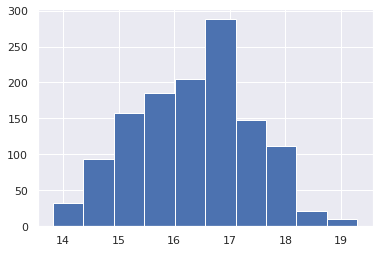

In [0]:
df7['LOG PRICE'] = np.log(df7['Price'])
plt.hist(df7['LOG PRICE'])

In [0]:
locality_dummies = pd.get_dummies(df7['Locality'], drop_first = True)

In [0]:
df8 = df7.join(locality_dummies)

In [0]:
df8.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,LOG PRICE,Budh Vihar,Chhattarpur,Chittaranjan Park,Dilshad Garden,Dwarka,Games Village,Geeta Colony,Greater Kailash,Hauz Khas,Kalkaji,Karol Bagh,Kirti Nagar,Lajpat Nagar,Laxmi Nagar,Mahavir Enclave,Malviya Nagar,Mathura Road,Mehrauli,Narela,New Friends Colony,Okhla,Other,Paschim Vihar,Patel Nagar,Punjabi Bagh,Rohini,Safdarjung Enclave,Saket,Shahdara,Sheikh Sarai,Sultanpur,Uttam Nagar,Vasant Kunj,Vasundhara Enclave
0,800.0,3,2.0,0.5,Rohini,1.0,6500000,1,1,0,15.687313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,750.0,2,2.0,0.5,Rohini,1.0,5000000,1,1,1,15.424948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,950.0,2,2.0,1.0,Rohini,1.0,15500000,1,0,1,16.556351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,600.0,2,2.0,0.5,Rohini,1.0,4200000,1,0,0,15.250595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,650.0,2,2.0,0.5,Rohini,1.0,6200000,1,1,0,15.640060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [0]:
targets = df8['LOG PRICE']
inputs = df8.drop(['LOG PRICE','Price','Locality'], axis =1)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_validation, y_train, y_validation = train_test_split(inputs, targets, test_size = 0.2, shuffle =True, random_state = 4)


In [0]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'XGB_Regressor':{
            'model': XGBRegressor(),
            'params':{
                'n_estimators': [100,200,300],
                'max_depth': [3,4,5,6],
                'learning_rate':[0.05,0.1]
            }
        },
        'Random_Forest_Regressor':{
            'model': RandomForestRegressor(),
            'params':{
                'n_estimators': [50,100,200,300],
                'max_features':["auto","sqrt"],
                'min_samples_split': [2,5,10],
                'min_samples_leaf' : [1,2,3]
            }
        },
        'LIGHT_GBM':{
        'model': LGBMRegressor(),
        'params':{
                  'n_estimators':[50,100,200,300],
                  'num_leaves': [31,41,51],
                  'learning_rate':[0.05,0.1]
        }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

results = find_best_model_using_gridsearchcv(x_train,y_train)

[11:32:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:32:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [0]:
results

,model,best_score,best_params
0,XGB_Regressor,0.882329,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti..."
1,Random_Forest_Regressor,0.877766,"{'max_features': 'sqrt', 'min_samples_leaf': 1..."
2,LIGHT_GBM,0.833847,"{'learning_rate': 0.05, 'n_estimators': 200, '..."


In [0]:
final_model = RandomForestRegressor(n_estimators=300, max_features='sqrt')
final_model.fit(x_train,y_train)
final_model.score(x_validation,y_validation)

0.8700617486280944

In [0]:
import pickle
with open('delhi_housing_price_model_new.pickle', 'wb') as f:
    pickle.dump(final_model, f)

NameError: ignored

In [0]:
import json
columns = {
    'data_columns' : [col.upper() for col in x_train.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [0]:
df8.to_csv('Clean_MagicBricks.csv',index=True)

In [0]:
def calc_price(area,bhk,bathroom,furnishing,parking,status,transaction,TYPE,locality):
    loc_index = np.where(x_train.columns==locality)[0][0]

    map_furnishing = {'Furnished':1,'Semi-Furnished':0.5,'Unfurnished':0}
    map_status = {'Ready To Move':1,'Almost Ready':0}
    map_transaction = {'New Property':1, 'Resale':0}
    map_type = {'Apartment':1,'Builder Floor':0}
  

    x = np.zeros(len(x_train.columns))
    x[0] = area
    x[1] = bhk
    x[2] = bathroom
    x[3] = map_furnishing[furnishing]
    x[5] = parking
    x[6] = map_status[status]
    x[7] = map_transaction[transaction]
    x[8] = map_type[TYPE]
    if loc_index >= 0:
        x[loc_index] = 1
    log_price = final_model.predict([x])[0]
    return np.exp(log_price)

In [0]:
calc_price(1540,3,3,'Furnished',1.0,'Ready To Move','Resale','Apartment',"New Friends Colony")

35093304.182733685